In [86]:
# Step 1: Import necessary libraries
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [87]:
# Step 1: Load the GSR data
df_gsr = pd.read_csv('Data/GSR_Shimmer_2024_09_20.csv', sep='\t', skiprows=0, header=1, low_memory=False, encoding='utf-8')

# Step 2: Remove the units row and reset the index
df_gsr = df_gsr.iloc[1:].reset_index(drop=True)

# Step 3: Drop the Unnamed column if it exists
df_gsr = df_gsr.drop(columns=['Unnamed: 15'], errors='ignore')
display(df_gsr.head())

# Step 4: Strip whitespace from all values
df_gsr = df_gsr.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 5: Convert all columns (except the timestamp) to numeric values
for col in df_gsr.columns:
    df_gsr[col] = pd.to_numeric(df_gsr[col], errors='coerce')

display(df_gsr.tail())

# Display the data types after conversion
print(df_gsr.info())

# Step 6: Extract and process relevant columns
timestamps = df_gsr['Shimmer_8280_Timestamp_Unix_CAL']
gsr_signal = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']

# Convert the timestamps from Unix time (milliseconds) to datetime format
df_gsr['adjusted_time'] = pd.to_datetime(timestamps / 1000, unit='s', errors='coerce')

# Display the first few rows with the adjusted timestamps
print(df_gsr[['adjusted_time', 'Shimmer_8280_GSR_Skin_Conductance_CAL']].head())



,Shimmer_8280_Timestamp_Unix_CAL,Shimmer_8280_Accel_LN_X_CAL,Shimmer_8280_Accel_LN_Y_CAL,Shimmer_8280_Accel_LN_Z_CAL,Shimmer_8280_GSR_Range_CAL,Shimmer_8280_GSR_Skin_Conductance_CAL,Shimmer_8280_GSR_Skin_Resistance_CAL,Shimmer_8280_Gyro_X_CAL,Shimmer_8280_Gyro_Y_CAL,Shimmer_8280_Gyro_Z_CAL,Shimmer_8280_Mag_X_CAL,Shimmer_8280_Mag_Y_CAL,Shimmer_8280_Mag_Z_CAL,Shimmer_8280_Pressure_BMP280_CAL,Shimmer_8280_Temperature_BMP280_CAL
0,1.7268354120016785E12,2.717391304347826,2.858695652173913,11.304347826086957,3.0,2.2200022200022121E-4,4504500.000000016,-7.480916030534351,0.9465648854961831,1.648854961832061,-0.2848575712143928,-0.010494752623688156,0.1394302848575712,99.75496381064217,22.25598996282206
1,1.7268354120212097E12,2.7391304347826084,2.8478260869565215,11.304347826086957,3.0,2.2200022200022121E-4,4504500.000000016,-7.511450381679389,0.9465648854961831,1.5877862595419847,-0.2848575712143928,-0.01199400299850075,0.13193403298350825,99.7495476023888,22.25598996282206
2,1.726835412040741E12,2.782608695652174,2.8478260869565215,11.315217391304348,0.0,0.6378364587319788,1567.8000000000056,-7.374045801526718,0.8091603053435115,1.66412213740458,-0.28785607196401797,-0.01649175412293853,0.14392803598200898,99.75496381064217,22.25598996282206
3,1.7268354120602722E12,2.7717391304347827,2.869565217391304,11.282608695652174,0.0,0.6378364587319788,1567.8000000000056,-8.183206106870228,1.129770992366412,1.4045801526717556,-0.29235382308845576,-0.010494752623688156,0.1394302848575712,99.74683950205075,22.25598996282206
4,1.7268354120798035E12,2.717391304347826,2.869565217391304,11.315217391304348,0.0,0.6378364587319788,1567.8000000000056,-7.633587786259541,1.3587786259541985,1.5419847328244274,-0.29535232383808097,0.0029985007496251873,0.12893553223388304,99.74142330895188,22.25598996282206


,Shimmer_8280_Timestamp_Unix_CAL,Shimmer_8280_Accel_LN_X_CAL,Shimmer_8280_Accel_LN_Y_CAL,Shimmer_8280_Accel_LN_Z_CAL,Shimmer_8280_GSR_Range_CAL,Shimmer_8280_GSR_Skin_Conductance_CAL,Shimmer_8280_GSR_Skin_Resistance_CAL,Shimmer_8280_Gyro_X_CAL,Shimmer_8280_Gyro_Y_CAL,Shimmer_8280_Gyro_Z_CAL,Shimmer_8280_Mag_X_CAL,Shimmer_8280_Mag_Y_CAL,Shimmer_8280_Mag_Z_CAL,Shimmer_8280_Pressure_BMP280_CAL,Shimmer_8280_Temperature_BMP280_CAL
54931,1.726837e+12,4.782609,5.326087,10.239130,2.0,3.663736,272.945411,-7.664122,-0.580153,0.183206,-0.326837,-0.113943,0.244378,101.171563,32.139802
54932,1.726837e+12,4.836957,5.445652,10.239130,2.0,3.663736,272.945411,-6.961832,0.274809,0.992366,-0.322339,-0.122939,0.241379,101.177066,32.139802
54933,1.726837e+12,4.815217,5.445652,10.217391,2.0,3.663736,272.945411,-6.931298,-0.290076,0.656489,-0.325337,-0.127436,0.245877,101.177066,32.139802
54934,1.726837e+12,4.804348,5.347826,10.260870,2.0,3.662271,273.054611,-7.709924,0.473282,0.992366,-0.325337,-0.124438,0.238381,101.174314,32.139802
54935,1.726837e+12,4.750000,5.347826,10.271739,2.0,3.660806,273.163898,-7.633588,1.603053,0.793893,-0.326837,-0.127436,0.235382,101.171563,32.139802


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54936 entries, 0 to 54935
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shimmer_8280_Timestamp_Unix_CAL        54936 non-null  float64
 1   Shimmer_8280_Accel_LN_X_CAL            54936 non-null  float64
 2   Shimmer_8280_Accel_LN_Y_CAL            54936 non-null  float64
 3   Shimmer_8280_Accel_LN_Z_CAL            54936 non-null  float64
 4   Shimmer_8280_GSR_Range_CAL             54936 non-null  float64
 5   Shimmer_8280_GSR_Skin_Conductance_CAL  54936 non-null  float64
 6   Shimmer_8280_GSR_Skin_Resistance_CAL   54936 non-null  float64
 7   Shimmer_8280_Gyro_X_CAL                54936 non-null  float64
 8   Shimmer_8280_Gyro_Y_CAL                54936 non-null  float64
 9   Shimmer_8280_Gyro_Z_CAL                54936 non-null  float64
 10  Shimmer_8280_Mag_X_CAL                 54936 non-null  float64
 11  Sh

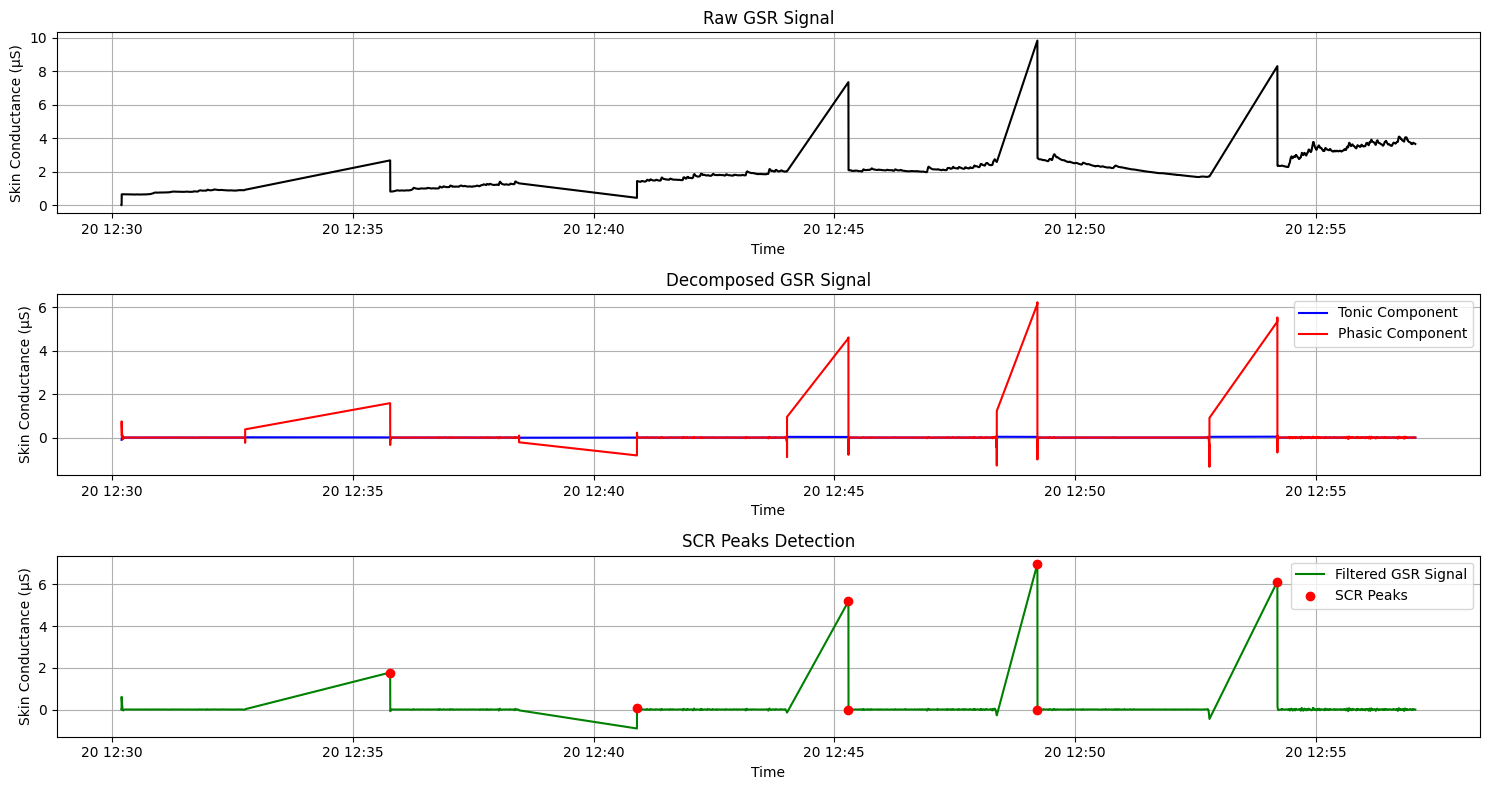

In [88]:
# Step 2: Extract the GSR signal and timestamps
# Extract the GSR signal (skin conductance) and adjusted timestamps from the DataFrame
gsr_signal = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
timestamps = df_gsr['adjusted_time']

# Step 3: Convert the GSR signal to a numeric array
# NeuroKit2 requires the signal to be a numeric array (not a Pandas Series)
gsr_signal = gsr_signal.to_numpy()

# Step 4: Apply a low-pass filter to remove noise
# The low-pass Butterworth filter removes high-frequency noise from the GSR signal
# - lowcut: 0.05 Hz (removes noise above this frequency)
# - highcut: None (no high-pass filter applied)
# - method: 'butterworth' (a commonly used filter type)
# - sampling_rate: 10 Hz (adjust based on your actual sampling rate)
gsr_filtered = nk.signal_filter(gsr_signal, lowcut=0.05, highcut=None, method='butterworth', sampling_rate=10)

# Step 5: Decompose the GSR signal into tonic and phasic components
# The tonic component represents the slow-changing baseline of the GSR
# The phasic component represents rapid changes (e.g., skin conductance responses)
# nk.eda_process() automatically performs decomposition and feature extraction
signals, info = nk.eda_process(gsr_filtered, sampling_rate=10)

# Step 6: Extract relevant features
# - Tonic component: slow-changing baseline level of the GSR
# - Phasic component: fast-changing part of the GSR (related to SCRs)
# - SCR peaks: detected peaks in the phasic component (representing rapid increases in GSR)
tonic = signals['EDA_Tonic']
phasic = signals['EDA_Phasic']
scr_peaks = signals['SCR_Peaks']

# Step 7: Plot the results
plt.figure(figsize=(15, 8))

# Plot the raw GSR signal
# This subplot shows the raw (unfiltered) GSR signal over time
plt.subplot(3, 1, 1)
plt.plot(timestamps, gsr_signal, label="Raw GSR Signal", color='black')
plt.title("Raw GSR Signal")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.grid(True)

# Plot the filtered and decomposed GSR components
# This subplot shows the tonic (baseline) and phasic (rapid changes) components of the GSR
plt.subplot(3, 1, 2)
plt.plot(timestamps, tonic, label="Tonic Component", color='blue')
plt.plot(timestamps, phasic, label="Phasic Component", color='red')
plt.title("Decomposed GSR Signal")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Plot the SCR peaks
# This subplot shows the filtered GSR signal with detected SCR peaks highlighted
plt.subplot(3, 1, 3)
plt.plot(timestamps, gsr_filtered, label="Filtered GSR Signal", color='green')
plt.scatter(timestamps[scr_peaks == 1], gsr_filtered[scr_peaks == 1], color='red', label="SCR Peaks", zorder=5)
plt.title("SCR Peaks Detection")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [89]:
# Adjust the 'adjusted_time' column by adding 2 hours
df_gsr['adjusted_time'] = df_gsr['adjusted_time'] + pd.DateOffset(hours=2)

# Verify the time adjustment
print(df_gsr[['adjusted_time']].head())
print(df_gsr[['adjusted_time']].tail())
df_gsr.info()


                  adjusted_time
0 2024-09-20 14:30:12.001678592
1 2024-09-20 14:30:12.021209600
2 2024-09-20 14:30:12.040740864
3 2024-09-20 14:30:12.060272128
4 2024-09-20 14:30:12.079803648
                      adjusted_time
54931 2024-09-20 14:57:03.888702464
54932 2024-09-20 14:57:03.908233728
54933 2024-09-20 14:57:03.927764992
54934 2024-09-20 14:57:03.947296000
54935 2024-09-20 14:57:03.966827520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54936 entries, 0 to 54935
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Shimmer_8280_Timestamp_Unix_CAL        54936 non-null  float64       
 1   Shimmer_8280_Accel_LN_X_CAL            54936 non-null  float64       
 2   Shimmer_8280_Accel_LN_Y_CAL            54936 non-null  float64       
 3   Shimmer_8280_Accel_LN_Z_CAL            54936 non-null  float64       
 4   Shimmer_8280_GSR_Range_CAL  

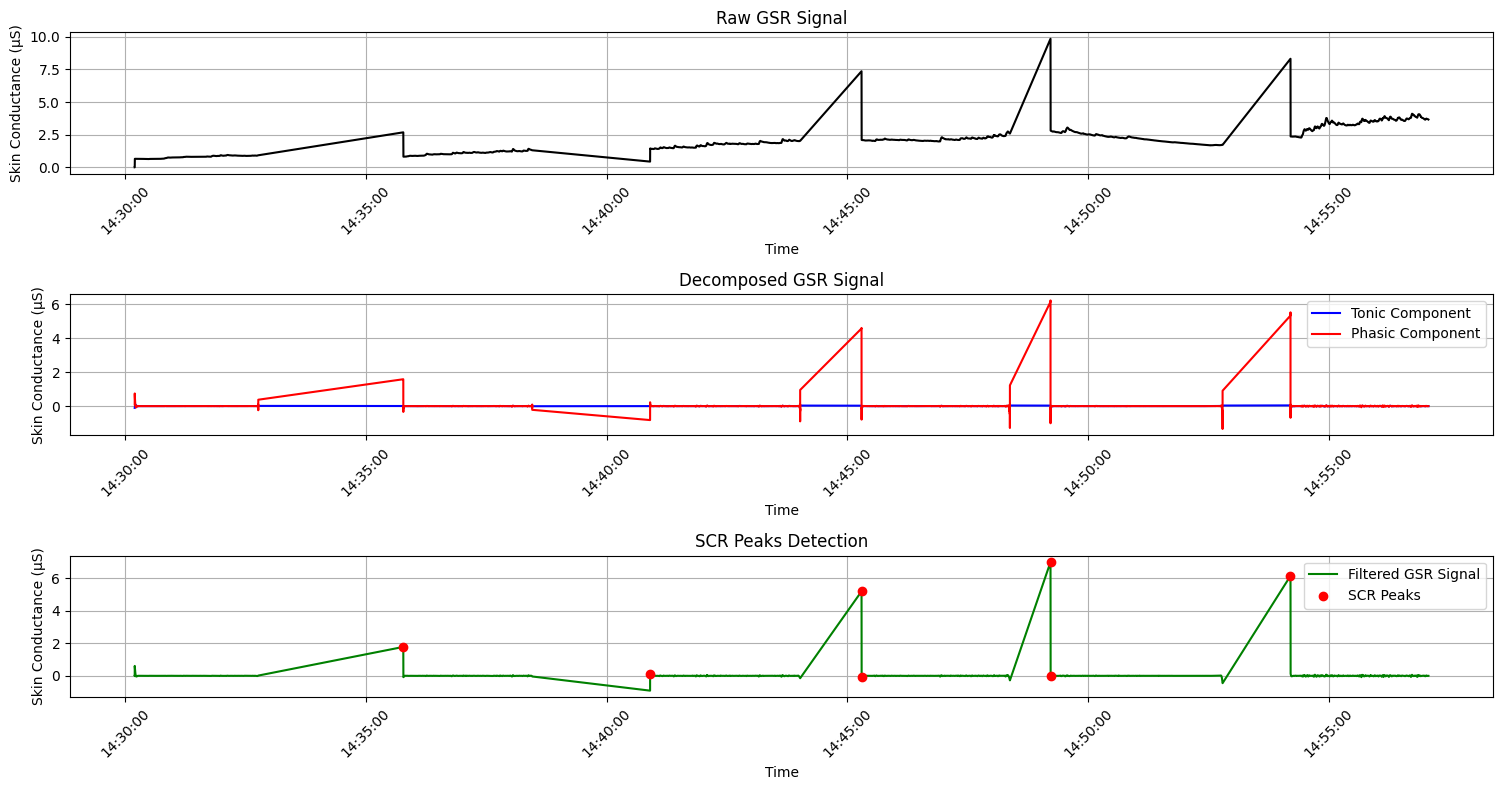

In [90]:
# Step 2: Extract the GSR signal and timestamps
# Extract the GSR signal (skin conductance) and adjusted timestamps from the DataFrame
gsr_signal = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL']
timestamps = df_gsr['adjusted_time']

# Step 3: Convert the GSR signal to a numeric array
# NeuroKit2 requires the signal to be a numeric array (not a Pandas Series)
gsr_signal = gsr_signal.to_numpy()

# Step 4: Apply a low-pass filter to remove noise
# The low-pass Butterworth filter removes high-frequency noise from the GSR signal
# - lowcut: 0.05 Hz (removes noise above this frequency)
# - highcut: None (no high-pass filter applied)
# - method: 'butterworth' (a commonly used filter type)
# - sampling_rate: 10 Hz (adjust based on your actual sampling rate)
gsr_filtered = nk.signal_filter(gsr_signal, lowcut=0.05, highcut=None, method='butterworth', sampling_rate=10)

# Step 5: Decompose the GSR signal into tonic and phasic components
# The tonic component represents the slow-changing baseline of the GSR
# The phasic component represents rapid changes (e.g., skin conductance responses)
# nk.eda_process() automatically performs decomposition and feature extraction
signals, info = nk.eda_process(gsr_filtered, sampling_rate=10)

# Step 6: Extract relevant features
# - Tonic component: slow-changing baseline level of the GSR
# - Phasic component: fast-changing part of the GSR (related to SCRs)
# - SCR peaks: detected peaks in the phasic component (representing rapid increases in GSR)
tonic = signals['EDA_Tonic']
phasic = signals['EDA_Phasic']
scr_peaks = signals['SCR_Peaks']

# Step 7: Plot the results
plt.figure(figsize=(15, 8))

# Plot the raw GSR signal
# This subplot shows the raw (unfiltered) GSR signal over time
plt.subplot(3, 1, 1)
plt.plot(timestamps, gsr_signal, label="Raw GSR Signal", color='black')
plt.title("Raw GSR Signal")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.grid(True)

# Format the x-axis with HH:MM:SS and rotate labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Plot the filtered and decomposed GSR components
# This subplot shows the tonic (baseline) and phasic (rapid changes) components of the GSR
plt.subplot(3, 1, 2)
plt.plot(timestamps, tonic, label="Tonic Component", color='blue')
plt.plot(timestamps, phasic, label="Phasic Component", color='red')
plt.title("Decomposed GSR Signal")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Format the x-axis with HH:MM:SS and rotate labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Plot the SCR peaks
# This subplot shows the filtered GSR signal with detected SCR peaks highlighted
plt.subplot(3, 1, 3)
plt.plot(timestamps, gsr_filtered, label="Filtered GSR Signal", color='green')
plt.scatter(timestamps[scr_peaks == 1], gsr_filtered[scr_peaks == 1], color='red', label="SCR Peaks", zorder=5)
plt.title("SCR Peaks Detection")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Format the x-axis with HH:MM:SS and rotate labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Number of SCR Peaks: 7
Mean SCR Amplitude: 2.6762 µS
Mean Skin Conductance Level (SCL): 0.0001 µS
Standard Deviation of GSR Signal: 0.0681 µS


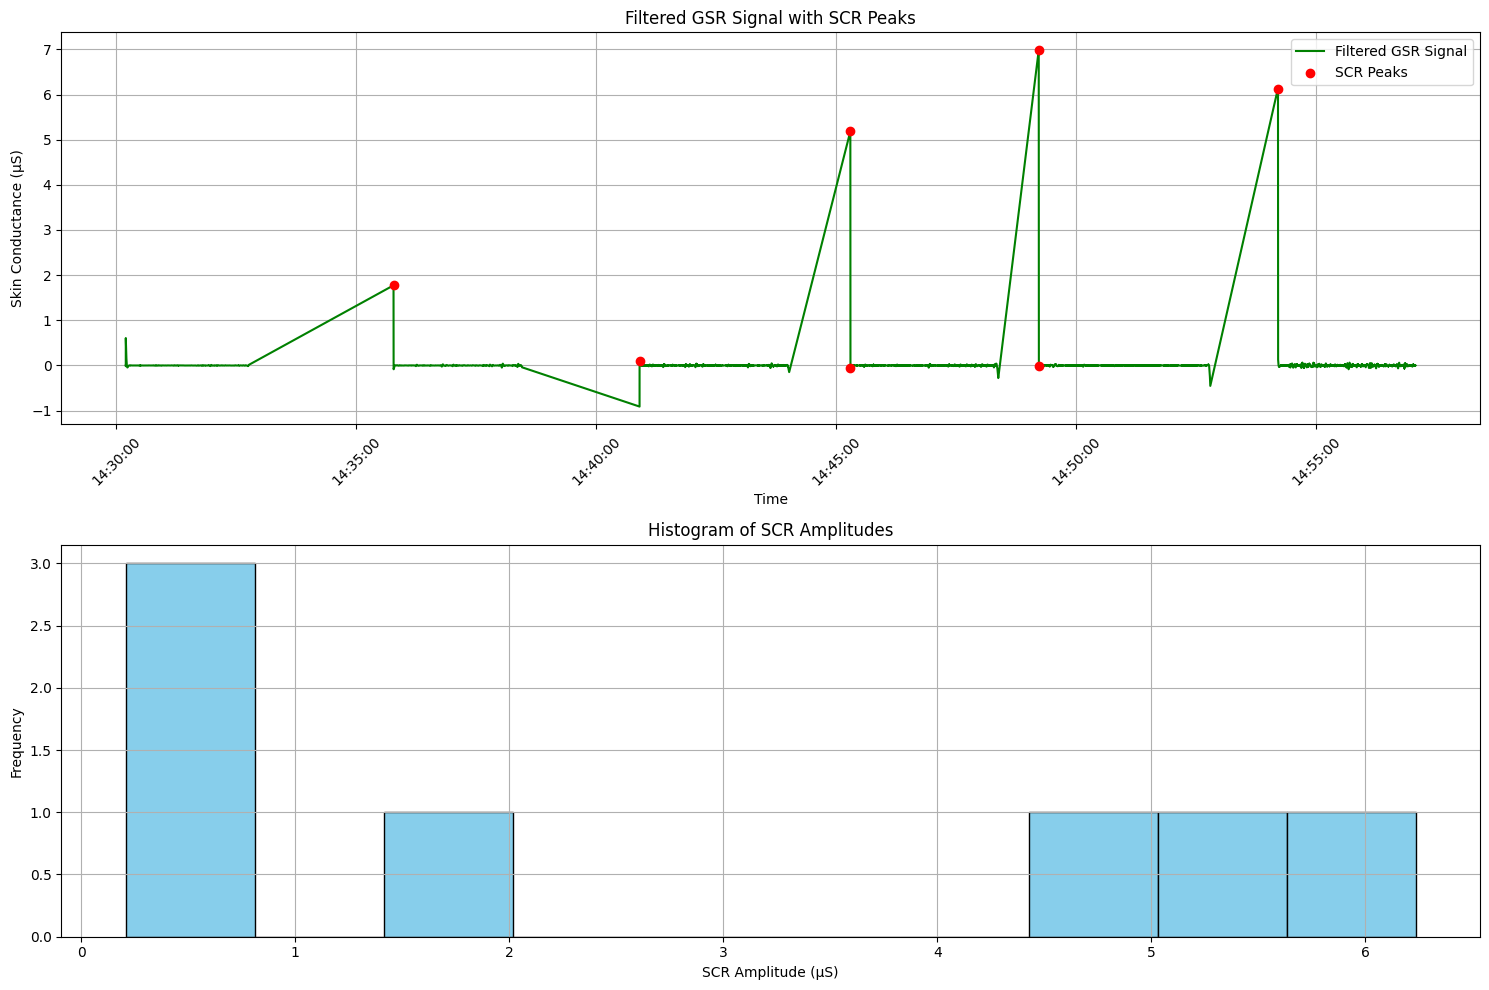

In [91]:

# Step 1: Count the number of SCR peaks
num_scr_peaks = np.sum(scr_peaks)
print(f"Number of SCR Peaks: {num_scr_peaks}")

# Step 2: Calculate the amplitude of each SCR peak
scr_amplitudes = phasic[scr_peaks == 1]
mean_scr_amplitude = np.mean(scr_amplitudes)
print(f"Mean SCR Amplitude: {mean_scr_amplitude:.4f} µS")

# Step 3: Compute the mean Skin Conductance Level (SCL)
mean_scl = np.mean(tonic)
print(f"Mean Skin Conductance Level (SCL): {mean_scl:.4f} µS")

# Step 4: Calculate the standard deviation of the filtered GSR signal
std_gsr = np.std(gsr_filtered)
print(f"Standard Deviation of GSR Signal: {std_gsr:.4f} µS")

# Step 5: Plot the analysis results
plt.figure(figsize=(15, 10))

# Plot the filtered GSR signal with SCR peaks highlighted
plt.subplot(2, 1, 1)
plt.plot(timestamps, gsr_filtered, label="Filtered GSR Signal", color='green')
plt.scatter(timestamps[scr_peaks == 1], gsr_filtered[scr_peaks == 1], color='red', label="SCR Peaks", zorder=5)
plt.title("Filtered GSR Signal with SCR Peaks")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Format the x-axis with HH:MM:SS and rotate labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Plot the histogram of SCR amplitudes
plt.subplot(2, 1, 2)
plt.hist(scr_amplitudes, bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of SCR Amplitudes")
plt.xlabel("SCR Amplitude (µS)")
plt.ylabel("Frequency")
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8117 entries, 0 to 8116
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype                    
---  ------                                 --------------  -----                    
 0   Shimmer_8280_Timestamp_Unix_CAL        8117 non-null   float64                  
 1   Shimmer_8280_Accel_LN_X_CAL            8117 non-null   float64                  
 2   Shimmer_8280_Accel_LN_Y_CAL            8117 non-null   float64                  
 3   Shimmer_8280_Accel_LN_Z_CAL            8117 non-null   float64                  
 4   Shimmer_8280_GSR_Range_CAL             8117 non-null   float64                  
 5   Shimmer_8280_GSR_Skin_Conductance_CAL  8117 non-null   float64                  
 6   Shimmer_8280_GSR_Skin_Resistance_CAL   8117 non-null   float64                  
 7   Shimmer_8280_Gyro_X_CAL                8117 non-null   float64                  
 8   Shimmer_8280_Gyro_Y_CAL     

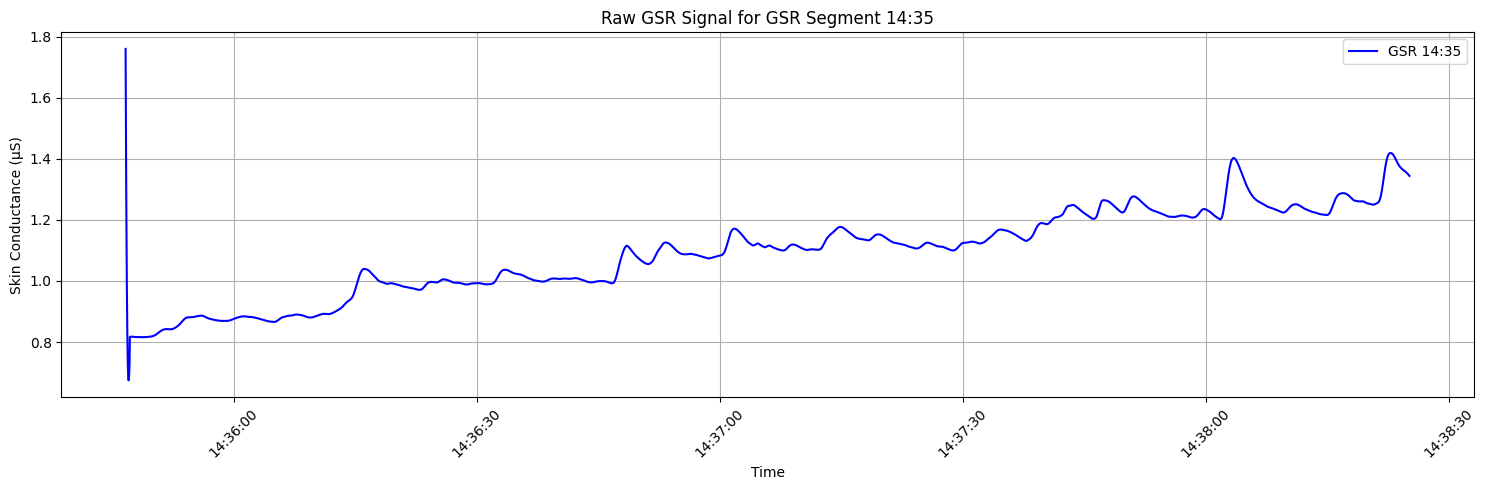

In [92]:
# Load a single GSR segment (e.g., GSR_2024_09_20_14_35.csv)
gsr_file = 'Data/GSR_2024_09_20_14_35.csv'
df_gsr_35 = pd.read_csv(gsr_file)
df_gsr_35['adjusted_time'] = pd.to_datetime(df_gsr_35['adjusted_time'])
df_gsr_35['adjusted_time'] = df_gsr_35['adjusted_time'] + pd.DateOffset(hours=2)
# Check the first few rows and the data types
print(df_gsr_35.info())

# Print the min and max adjusted_time to verify the timestamps
gsr_start_time = df_gsr_35['adjusted_time'].min()
gsr_end_time = df_gsr_35['adjusted_time'].max()
print(f"GSR segment: Start time: {gsr_start_time}, End time: {gsr_end_time}")
# Extract the GSR signal
gsr_signal = df_gsr_35['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()

# Apply a low-pass filter to remove noise
#gsr_filtered = nk.signal_filter(gsr_signal, lowcut=0.05, highcut=None, method='butterworth', sampling_rate=10)
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
gsr_filtered = savgol_filter(gsr_signal, window_length=51, polyorder=3)

# Plot the raw GSR signal
plt.figure(figsize=(15, 5))
plt.plot(df_gsr_35['adjusted_time'], gsr_filtered, color='blue', label="GSR 14:35")
plt.title("Raw GSR Signal for GSR Segment 14:35")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.legend()
plt.grid(True)

# Format the x-axis with HH:MM:SS and rotate labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

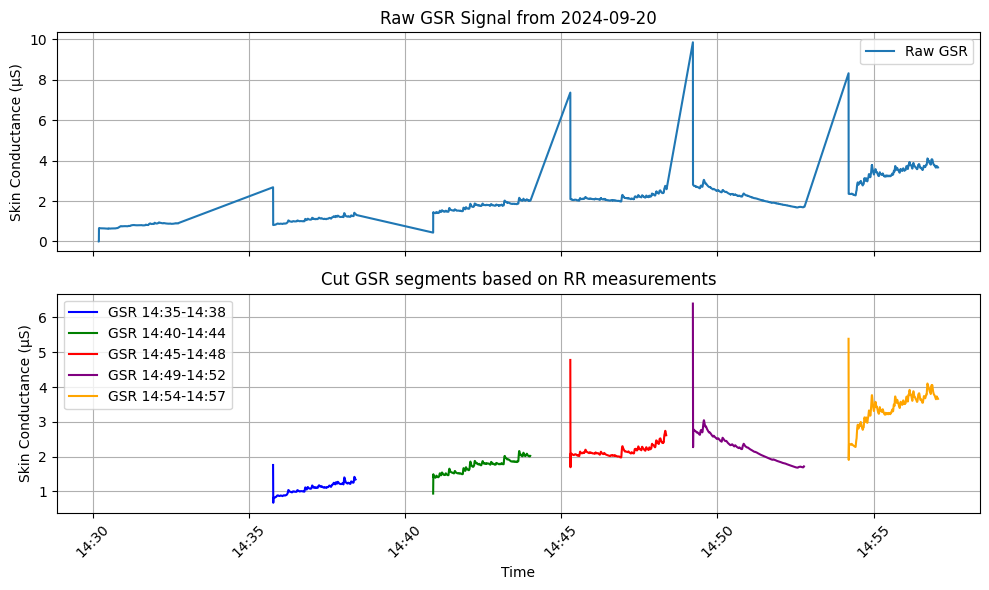

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# List of GSR segment files, corresponding labels, and colors
gsr_files = [
    'Data/GSR_2024_09_20_14_35.csv',
    'Data/GSR_2024_09_20_14_40.csv',
    'Data/GSR_2024_09_20_14_45.csv',
    'Data/GSR_2024_09_20_14_49.csv',
    'Data/GSR_2024_09_20_14_54.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Extract the GSR signal and timestamps
gsr_signal = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()
timestamps = df_gsr['adjusted_time']
# Plot the raw GSR signal on the first subplot
axs[0].plot(timestamps, gsr_signal, label=f"Raw GSR")
# Configure the first subplot (Raw GSR Signals)
axs[0].set_title("Raw GSR Signal from 2024-09-20")
axs[0].set_ylabel("Skin Conductance (µS)")
axs[0].legend()
axs[0].grid(True)

# Iterate through each GSR file and plot the raw and filtered data
for gsr_file, color in zip(gsr_files, colors):
    # Extract the time suffix (e.g., '35', '40', etc.)
    time_suffix = gsr_file[-6:-4]
    df_name = f"df_gsr_{time_suffix}"

    # Load the GSR segment
    globals()[df_name] = pd.read_csv(gsr_file)
    df = globals()[df_name]

    # Convert 'adjusted_time' to datetime and add 2-hour offset
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'])
    df['adjusted_time_for_plot'] = df['adjusted_time'] + pd.DateOffset(hours=2)
    gsr_signal_cut = df['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()

    # Determine the start and end time of the segment in HH:MM format
    start_time = df['adjusted_time'].min().strftime('%H:%M')
    end_time = df['adjusted_time'].max().strftime('%H:%M')
    label = f"GSR {start_time}-{end_time}"

    # Apply Savitzky-Golay filter to the GSR signal
    gsr_filtered = savgol_filter(gsr_signal_cut, window_length=51, polyorder=3)

    # Plot the filtered GSR signal on the second subplot
    axs[1].plot(df['adjusted_time_for_plot'], gsr_filtered, color=color, label=f"{label}")


# Configure the second subplot (Filtered GSR Signals)
axs[1].set_title("Cut GSR segments based on RR measurements")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Skin Conductance (µS)")
axs[1].legend()
axs[1].grid(True)

# Format the x-axis for both subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


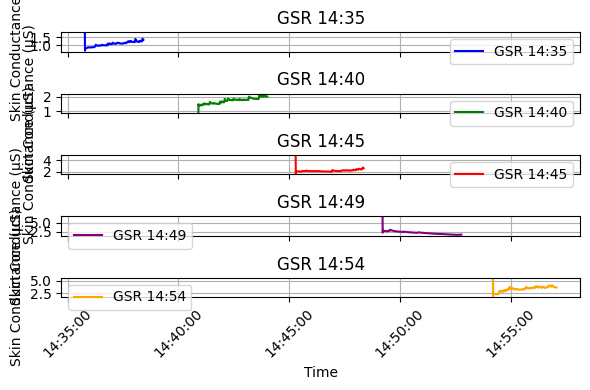

In [94]:
# List of GSR segment files, corresponding labels, and unique DataFrame names
gsr_files = [
    'Data/GSR_2024_09_20_14_35.csv',
    'Data/GSR_2024_09_20_14_40.csv',
    'Data/GSR_2024_09_20_14_45.csv',
    'Data/GSR_2024_09_20_14_49.csv',
    'Data/GSR_2024_09_20_14_54.csv'
]
labels = ['GSR 14:35', 'GSR 14:40', 'GSR 14:45', 'GSR 14:49', 'GSR 14:54']
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the subplots
fig, axs = plt.subplots(5, 1, figsize=(6, 4), sharex=True)

# Iterate through each GSR file and create a subplot
for i, (gsr_file, label, color) in enumerate(zip(gsr_files, labels, colors)):
    # Create a unique DataFrame name based on the time suffix
    time_suffix = gsr_file[-6:-4]
    df_name = f"df_gsr_{time_suffix}"

    # Load the GSR segment
    globals()[df_name] = pd.read_csv(gsr_file)
    df = globals()[df_name]

    # Convert 'adjusted_time' to datetime and add 2-hour offset
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'])
    df['adjusted_time'] = df['adjusted_time'] + pd.DateOffset(hours=2)

    # Extract the GSR signal
    gsr_signal = df['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()

    # Apply Savitzky-Golay filter
    gsr_filtered = savgol_filter(gsr_signal, window_length=51, polyorder=3)

    # Plot the filtered GSR signal on the subplot
    axs[i].plot(df['adjusted_time'], gsr_filtered, color=color, label=label)
    axs[i].set_title(label)
    axs[i].set_ylabel("Skin Conductance (µS)")
    axs[i].legend()
    axs[i].grid(True)

# Configure the x-axis for the shared plot
axs[-1].set_xlabel("Time")
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


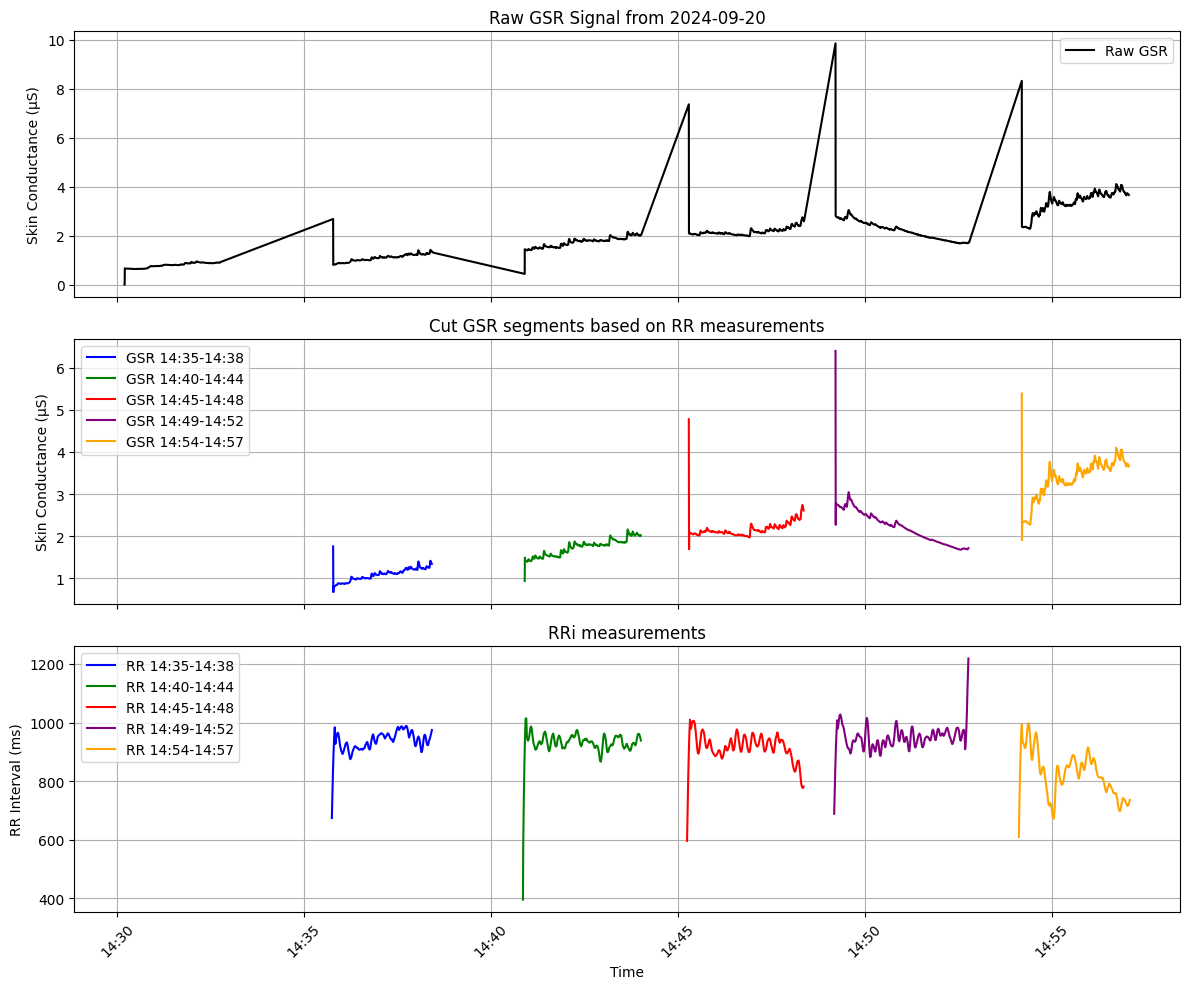

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# List of GSR and RR segment files, labels, and colors
gsr_files = [
    'Data/GSR_2024_09_20_14_35.csv',
    'Data/GSR_2024_09_20_14_40.csv',
    'Data/GSR_2024_09_20_14_45.csv',
    'Data/GSR_2024_09_20_14_49.csv',
    'Data/GSR_2024_09_20_14_54.csv'
]
rr_files = [
    'Data/RR_2024_09_20_14_35.csv',
    'Data/RR_2024_09_20_14_40.csv',
    'Data/RR_2024_09_20_14_45.csv',
    'Data/RR_2024_09_20_14_49.csv',
    'Data/RR_2024_09_20_14_54.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Extract the GSR signal and timestamps
gsr_signal = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()
timestamps = df_gsr['adjusted_time']

# Plot the raw GSR signal on the first subplot
axs[0].plot(timestamps, gsr_signal, label="Raw GSR", color='black')
axs[0].set_title("Raw GSR Signal from 2024-09-20")
axs[0].set_ylabel("Skin Conductance (µS)")
axs[0].legend()
axs[0].grid(True)

# Iterate through each GSR file and plot the filtered GSR data
for gsr_file, color in zip(gsr_files, colors):
    time_suffix = gsr_file[-6:-4]
    df_name = f"df_gsr_{time_suffix}"

    globals()[df_name] = pd.read_csv(gsr_file)
    df = globals()[df_name]

    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'])
    df['adjusted_time_for_plot'] = df['adjusted_time'] + pd.DateOffset(hours=2)
    gsr_signal_cut = df['Shimmer_8280_GSR_Skin_Conductance_CAL'].to_numpy()

    start_time = df['adjusted_time'].min().strftime('%H:%M')
    end_time = df['adjusted_time'].max().strftime('%H:%M')
    label = f"GSR {start_time}-{end_time}"

    gsr_filtered = savgol_filter(gsr_signal_cut, window_length=51, polyorder=3)

    axs[1].plot(df['adjusted_time_for_plot'], gsr_filtered, color=color, label=label)

# Configure the second subplot (Filtered GSR Signals)
axs[1].set_title("Cut GSR segments based on RR measurements")
axs[1].set_ylabel("Skin Conductance (µS)")
axs[1].legend()
axs[1].grid(True)

# Iterate through each RR file and plot the RR intervals
for rr_file, color in zip(rr_files, colors):
    time_suffix = rr_file[-6:-4]
    df_rr = pd.read_csv(rr_file)

    df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)

    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"RR {start_time}-{end_time}"

    rr_intervals = df_rr['sample'].to_numpy()
    rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    axs[2].plot(df_rr['adjusted_time'], rr_filtered, color=color, label=label)

# Configure the third subplot (Filtered RR Intervals)
axs[2].set_title("RRi measurements")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Skin Resistance Data Range: 101.5698729582577 - 4504500.000000016


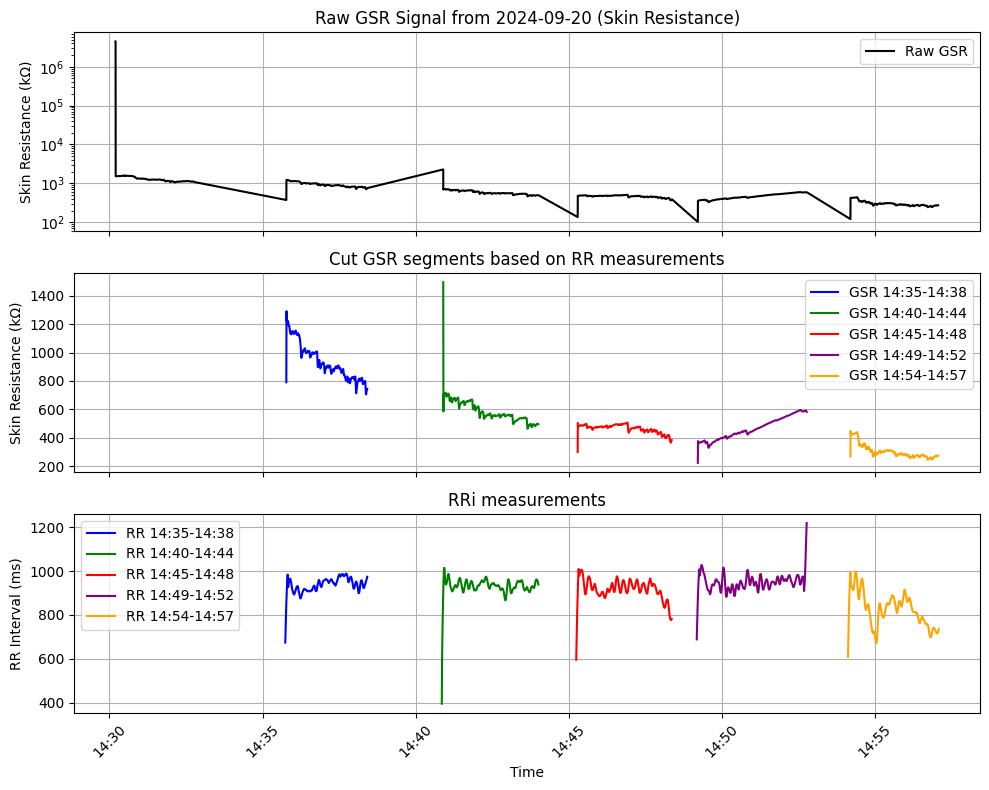

In [96]:
# List of GSR and RR segment files, labels, and colors
gsr_files = [
    'Data/GSR_2024_09_20_14_35.csv',
    'Data/GSR_2024_09_20_14_40.csv',
    'Data/GSR_2024_09_20_14_45.csv',
    'Data/GSR_2024_09_20_14_49.csv',
    'Data/GSR_2024_09_20_14_54.csv'
]
rr_files = [
    'Data/RR_2024_09_20_14_35.csv',
    'Data/RR_2024_09_20_14_40.csv',
    'Data/RR_2024_09_20_14_45.csv',
    'Data/RR_2024_09_20_14_49.csv',
    'Data/RR_2024_09_20_14_54.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']


# Convert the skin resistance column to numeric
df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] = pd.to_numeric(df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], errors='coerce')

# Extract the raw skin resistance signal
gsr_resistance_signal = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'].to_numpy()
timestamps = df_gsr['adjusted_time']

# Initialize the figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the raw GSR resistance signal with logarithmic y-axis
axs[0].plot(timestamps, gsr_resistance_signal, label="Raw GSR", color='black')
axs[0].set_title("Raw GSR Signal from 2024-09-20 (Skin Resistance)")
axs[0].set_ylabel("Skin Resistance (kΩ)")
axs[0].set_yscale('log')  # Apply logarithmic scale to y-axis
axs[0].legend()
axs[0].grid(True)

# Check the data range of the raw signal
print("Skin Resistance Data Range:", np.nanmin(gsr_resistance_signal), "-", np.nanmax(gsr_resistance_signal))




# Iterate through each GSR file and plot the filtered GSR data
for gsr_file, color in zip(gsr_files, colors):
    time_suffix = gsr_file[-6:-4]
    df_name = f"df_gsr_{time_suffix}"

    globals()[df_name] = pd.read_csv(gsr_file)
    df = globals()[df_name]

    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'])
    df['adjusted_time_for_plot'] = df['adjusted_time'] + pd.DateOffset(hours=2)
    gsr_signal_cut = df['Shimmer_8280_GSR_Skin_Resistance_CAL'].to_numpy()

    start_time = df['adjusted_time'].min().strftime('%H:%M')
    end_time = df['adjusted_time'].max().strftime('%H:%M')
    label = f"GSR {start_time}-{end_time}"

    gsr_filtered = savgol_filter(gsr_signal_cut, window_length=51, polyorder=3)

    axs[1].plot(df['adjusted_time_for_plot'], gsr_filtered, color=color, label=label)

# Configure the second subplot (Filtered GSR Signals)
axs[1].set_title("Cut GSR segments based on RR measurements")
axs[1].set_ylabel("Skin Resistance (kΩ)")
axs[1].legend()
axs[1].grid(True)

# Iterate through each RR file and plot the RR intervals
for rr_file, color in zip(rr_files, colors):
    time_suffix = rr_file[-6:-4]
    df_rr = pd.read_csv(rr_file)

    df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)

    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"RR {start_time}-{end_time}"

    rr_intervals = df_rr['sample'].to_numpy()
    rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    axs[2].plot(df_rr['adjusted_time'], rr_filtered, color=color, label=label)

# Configure the third subplot (Filtered RR Intervals)
axs[2].set_title("RRi measurements")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

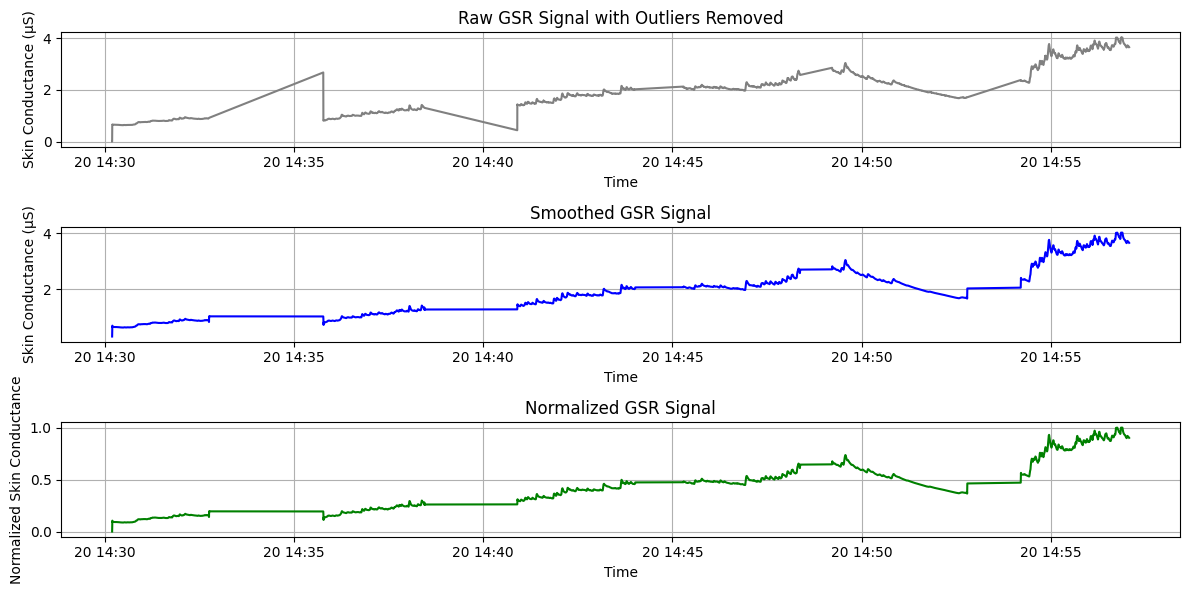

In [97]:
# Preprocessing/Cleaning the full GSR data

# Step 1: Remove invalid or missing values
df_gsr['GSR'] = pd.to_numeric(df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'], errors='coerce')
df_gsr.dropna(subset=['GSR'], inplace=True)

# Step 2: Detect and remove outliers using IQR
Q1 = df_gsr['GSR'].quantile(0.25)
Q3 = df_gsr['GSR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_gsr = df_gsr[(df_gsr['GSR'] >= lower_bound) & (df_gsr['GSR'] <= upper_bound)]

# Step 3: Apply Savitzky-Golay filter to smooth the signal
df_gsr['GSR_Smoothed'] = savgol_filter(df_gsr['GSR'], window_length=51, polyorder=3)

# Step 4: Normalize the GSR signal
df_gsr['GSR_Normalized'] = (df_gsr['GSR_Smoothed'] - df_gsr['GSR_Smoothed'].min()) / \
                           (df_gsr['GSR_Smoothed'].max() - df_gsr['GSR_Smoothed'].min())

# Step 5: Plot the results
plt.figure(figsize=(12, 6))

# Plot raw GSR signal
plt.subplot(3, 1, 1)
plt.plot(df_gsr['adjusted_time'], df_gsr['GSR'], label="Raw GSR Signal", color='gray')
plt.title("Raw GSR Signal with Outliers Removed")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.grid()

# Plot smoothed GSR signal
plt.subplot(3, 1, 2)
plt.plot(df_gsr['adjusted_time'], df_gsr['GSR_Smoothed'], label="Smoothed GSR Signal", color='blue')
plt.title("Smoothed GSR Signal")
plt.xlabel("Time")
plt.ylabel("Skin Conductance (µS)")
plt.grid()

# Plot normalized GSR signal
plt.subplot(3, 1, 3)
plt.plot(df_gsr['adjusted_time'], df_gsr['GSR_Normalized'], label="Normalized GSR Signal", color='green')
plt.title("Normalized GSR Signal")
plt.xlabel("Time")
plt.ylabel("Normalized Skin Conductance")
plt.grid()

plt.tight_layout()
plt.show()

In [98]:
df_gsr

,Shimmer_8280_Timestamp_Unix_CAL,Shimmer_8280_Accel_LN_X_CAL,Shimmer_8280_Accel_LN_Y_CAL,Shimmer_8280_Accel_LN_Z_CAL,Shimmer_8280_GSR_Range_CAL,Shimmer_8280_GSR_Skin_Conductance_CAL,Shimmer_8280_GSR_Skin_Resistance_CAL,Shimmer_8280_Gyro_X_CAL,Shimmer_8280_Gyro_Y_CAL,Shimmer_8280_Gyro_Z_CAL,Shimmer_8280_Mag_X_CAL,Shimmer_8280_Mag_Y_CAL,Shimmer_8280_Mag_Z_CAL,Shimmer_8280_Pressure_BMP280_CAL,Shimmer_8280_Temperature_BMP280_CAL,adjusted_time,GSR,GSR_Smoothed,GSR_Normalized
0,1.726835e+12,2.717391,2.858696,11.304348,3.0,0.000222,4.504500e+06,-7.480916,0.946565,1.648855,-0.284858,-0.010495,0.139430,99.754964,22.255990,2024-09-20 14:30:12.001678592,0.000222,0.313237,0.000000
1,1.726835e+12,2.739130,2.847826,11.304348,3.0,0.000222,4.504500e+06,-7.511450,0.946565,1.587786,-0.284858,-0.011994,0.131934,99.749548,22.255990,2024-09-20 14:30:12.021209600,0.000222,0.359505,0.012451
2,1.726835e+12,2.782609,2.847826,11.315217,0.0,0.637836,1.567800e+03,-7.374046,0.809160,1.664122,-0.287856,-0.016492,0.143928,99.754964,22.255990,2024-09-20 14:30:12.040740864,0.637836,0.402186,0.023936
3,1.726835e+12,2.771739,2.869565,11.282609,0.0,0.637836,1.567800e+03,-8.183206,1.129771,1.404580,-0.292354,-0.010495,0.139430,99.746840,22.255990,2024-09-20 14:30:12.060272128,0.637836,0.441408,0.034491
4,1.726835e+12,2.717391,2.869565,11.315217,0.0,0.637836,1.567800e+03,-7.633588,1.358779,1.541985,-0.295352,0.002999,0.128936,99.741423,22.255990,2024-09-20 14:30:12.079803648,0.637836,0.477296,0.044148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54931,1.726837e+12,4.782609,5.326087,10.239130,2.0,3.663736,2.729454e+02,-7.664122,-0.580153,0.183206,-0.326837,-0.113943,0.244378,101.171563,32.139802,2024-09-20 14:57:03.888702464,3.663736,3.664558,0.901831
54932,1.726837e+12,4.836957,5.445652,10.239130,2.0,3.663736,2.729454e+02,-6.961832,0.274809,0.992366,-0.322339,-0.122939,0.241379,101.177066,32.139802,2024-09-20 14:57:03.908233728,3.663736,3.663756,0.901616
54933,1.726837e+12,4.815217,5.445652,10.217391,2.0,3.663736,2.729454e+02,-6.931298,-0.290076,0.656489,-0.325337,-0.127436,0.245877,101.177066,32.139802,2024-09-20 14:57:03.927764992,3.663736,3.662943,0.901397
54934,1.726837e+12,4.804348,5.347826,10.260870,2.0,3.662271,2.730546e+02,-7.709924,0.473282,0.992366,-0.325337,-0.124438,0.238381,101.174314,32.139802,2024-09-20 14:57:03.947296000,3.662271,3.662119,0.901175


Cleaned GSR data saved to: Data/Cleaned_data\GSR_full_cleaned.csv


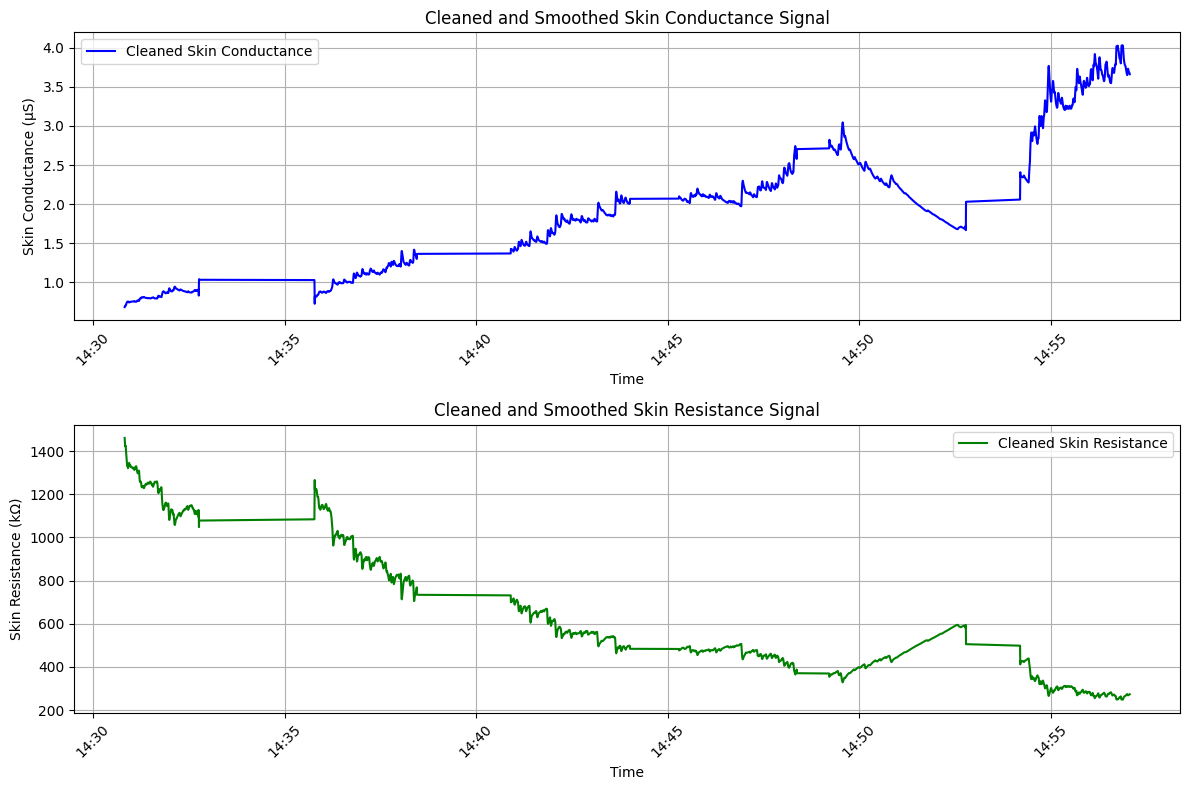

In [99]:
import os
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot the cleaned and smoothed conductance and resistance signal

# Ensure the output directory exists
output_dir = "Data/Cleaned_data"
os.makedirs(output_dir, exist_ok=True)

# Load the GSR full dataset
# Assuming `df_gsr` is the dataframe containing the full GSR data
df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'] = pd.to_numeric(
    df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'], errors='coerce'
)
df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] = pd.to_numeric(
    df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], errors='coerce'
)

# Step 1: Remove invalid or missing values
df_gsr.dropna(
    subset=['Shimmer_8280_GSR_Skin_Conductance_CAL', 'Shimmer_8280_GSR_Skin_Resistance_CAL'],
    inplace=True
)

# Step 2: Detect and remove outliers using IQR for conductance
Q1_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'].quantile(0.25)
Q3_conductance = df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'].quantile(0.75)
IQR_conductance = Q3_conductance - Q1_conductance
lower_bound_conductance = Q1_conductance - 1.5 * IQR_conductance
upper_bound_conductance = Q3_conductance + 1.5 * IQR_conductance

df_gsr = df_gsr[
    (df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'] >= lower_bound_conductance) &
    (df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'] <= upper_bound_conductance)
]

# Step 3: Detect and remove outliers using IQR for resistance
Q1_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'].quantile(0.25)
Q3_resistance = df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'].quantile(0.75)
IQR_resistance = Q3_resistance - Q1_resistance
lower_bound_resistance = Q1_resistance - 1.5 * IQR_resistance
upper_bound_resistance = Q3_resistance + 1.5 * IQR_resistance

df_gsr = df_gsr[
    (df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] >= lower_bound_resistance) &
    (df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] <= upper_bound_resistance)
]

# Step 4: Apply Savitzky-Golay filter to smooth both signals
df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'] = savgol_filter(
    df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'], window_length=51, polyorder=3
)
df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'] = savgol_filter(
    df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], window_length=51, polyorder=3
)

# Step 5: Save the cleaned dataframe
cleaned_gsr_path = os.path.join(output_dir, "GSR_full_cleaned.csv")
cleaned_df = df_gsr[['adjusted_time',
                     'Shimmer_8280_GSR_Skin_Conductance_CAL',
                     'Shimmer_8280_GSR_Skin_Resistance_CAL']]
cleaned_df.to_csv(cleaned_gsr_path, index=False)
print(f"Cleaned GSR data saved to: {cleaned_gsr_path}")

# Step 6: Plot the cleaned and smoothed data
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot cleaned and smoothed skin conductance
axs[0].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'], color='blue', label='Cleaned Skin Conductance')
axs[0].set_title("Cleaned and Smoothed Skin Conductance Signal")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Skin Conductance (µS)")
axs[0].grid()
axs[0].legend()

# Plot cleaned and smoothed skin resistance
axs[1].plot(df_gsr['adjusted_time'], df_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'], color='green', label='Cleaned Skin Resistance')
axs[1].set_title("Cleaned and Smoothed Skin Resistance Signal")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Skin Resistance (kΩ)")
axs[1].grid()
axs[1].legend()

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [100]:
# Cleaning and saving individual gsr files
import os
import pandas as pd
from scipy.signal import savgol_filter

gsr_files = [
    'Data/GSR_2024_09_20_14_35.csv',
    'Data/GSR_2024_09_20_14_40.csv',
    'Data/GSR_2024_09_20_14_45.csv',
    'Data/GSR_2024_09_20_14_49.csv',
    'Data/GSR_2024_09_20_14_54.csv'
]

# Ensure the output directory exists
output_dir = "Data/Cleaned_data"
os.makedirs(output_dir, exist_ok=True)

# Iterate through each GSR file for cleaning and saving
for gsr_file in gsr_files:
    # Extract the time suffix for creating output filenames
    time_suffix = gsr_file[-20:-4]  # Adjust based on file naming convention
    output_filename = f"GSR_{time_suffix}_cleaned.csv"
    output_path = os.path.join(output_dir, output_filename)

    # Load the GSR file
    df = pd.read_csv(gsr_file)

    # Convert adjusted_time to datetime
    df['adjusted_time'] = pd.to_datetime(df['adjusted_time'], errors='coerce')

    # Data cleaning for Skin Conductance
    df['Shimmer_8280_GSR_Skin_Conductance_CAL'] = pd.to_numeric(
        df['Shimmer_8280_GSR_Skin_Conductance_CAL'], errors='coerce'
    )
    Q1_conductance = df['Shimmer_8280_GSR_Skin_Conductance_CAL'].quantile(0.25)
    Q3_conductance = df['Shimmer_8280_GSR_Skin_Conductance_CAL'].quantile(0.75)
    IQR_conductance = Q3_conductance - Q1_conductance
    lower_bound_conductance = Q1_conductance - 1.5 * IQR_conductance
    upper_bound_conductance = Q3_conductance + 1.5 * IQR_conductance
    df = df[
        (df['Shimmer_8280_GSR_Skin_Conductance_CAL'] >= lower_bound_conductance) &
        (df['Shimmer_8280_GSR_Skin_Conductance_CAL'] <= upper_bound_conductance)
    ]

    # Data cleaning for Skin Resistance
    df['Shimmer_8280_GSR_Skin_Resistance_CAL'] = pd.to_numeric(
        df['Shimmer_8280_GSR_Skin_Resistance_CAL'], errors='coerce'
    )
    Q1_resistance = df['Shimmer_8280_GSR_Skin_Resistance_CAL'].quantile(0.25)
    Q3_resistance = df['Shimmer_8280_GSR_Skin_Resistance_CAL'].quantile(0.75)
    IQR_resistance = Q3_resistance - Q1_resistance
    lower_bound_resistance = Q1_resistance - 1.5 * IQR_resistance
    upper_bound_resistance = Q3_resistance + 1.5 * IQR_resistance
    df = df[
        (df['Shimmer_8280_GSR_Skin_Resistance_CAL'] >= lower_bound_resistance) &
        (df['Shimmer_8280_GSR_Skin_Resistance_CAL'] <= upper_bound_resistance)
    ]

    # Smoothing signals using Savitzky-Golay filter
    df['Shimmer_8280_GSR_Skin_Conductance_CAL'] = savgol_filter(
        df['Shimmer_8280_GSR_Skin_Conductance_CAL'], window_length=51, polyorder=3
    )
    df['Shimmer_8280_GSR_Skin_Resistance_CAL'] = savgol_filter(
        df['Shimmer_8280_GSR_Skin_Resistance_CAL'], window_length=51, polyorder=3
    )

    # Create adjusted time for plotting
    df['adjusted_time_for_plot'] = df['adjusted_time'] + pd.DateOffset(hours=2)

    # Select and save the cleaned data
    cleaned_df = df[['adjusted_time', 'adjusted_time_for_plot',
                     'Shimmer_8280_GSR_Skin_Conductance_CAL', 'Shimmer_8280_GSR_Skin_Resistance_CAL']]
    cleaned_df.to_csv(output_path, index=False)

    print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: Data/Cleaned_data\GSR_2024_09_20_14_35_cleaned.csv
Cleaned data saved to: Data/Cleaned_data\GSR_2024_09_20_14_40_cleaned.csv
Cleaned data saved to: Data/Cleaned_data\GSR_2024_09_20_14_45_cleaned.csv
Cleaned data saved to: Data/Cleaned_data\GSR_2024_09_20_14_49_cleaned.csv
Cleaned data saved to: Data/Cleaned_data\GSR_2024_09_20_14_54_cleaned.csv


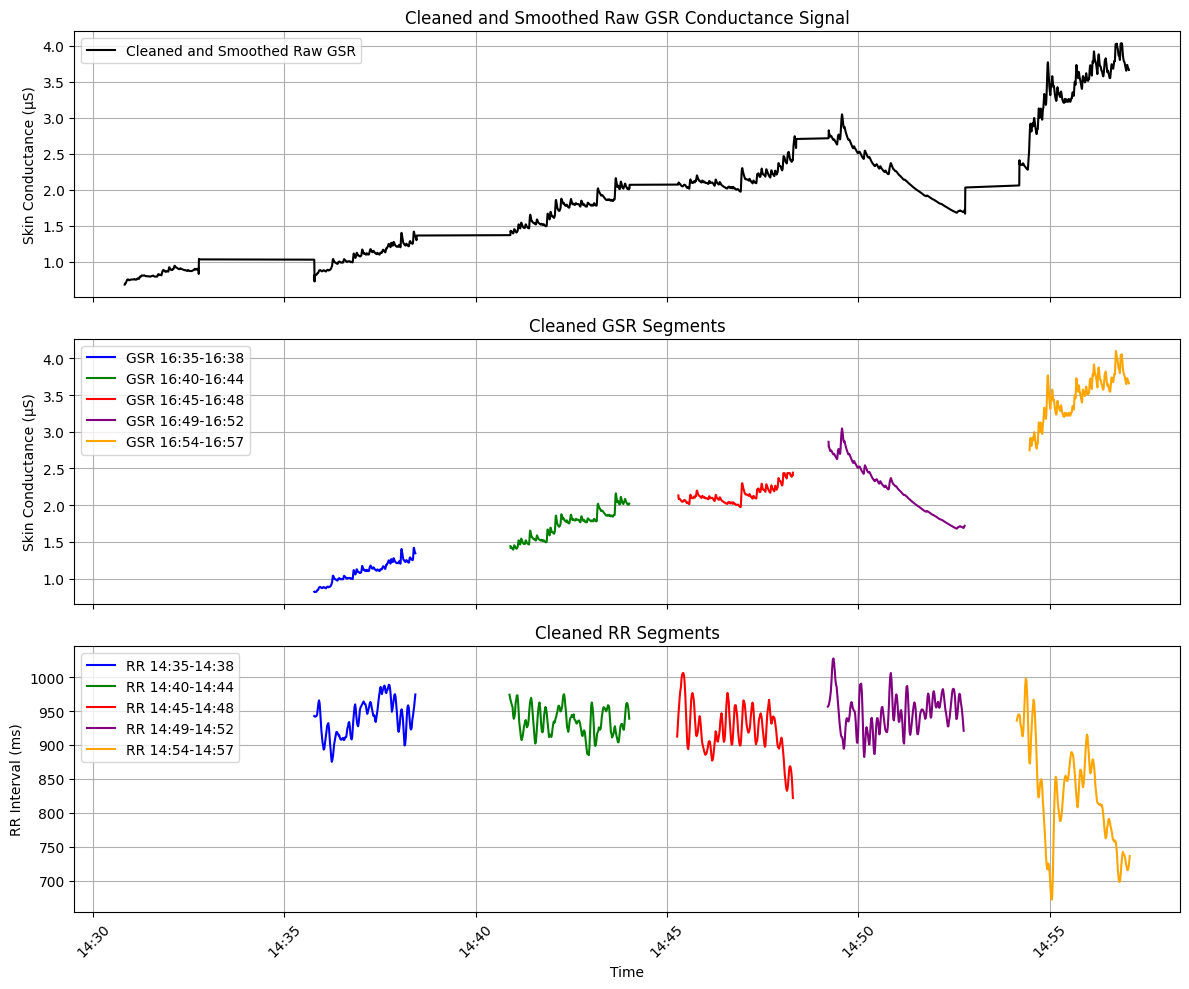

In [101]:
#Plot cleaned full gsr conductance with gsr segments and rr segments

# Paths to cleaned GSR and RR files
cleaned_gsr_file = 'Data/Cleaned_data/GSR_full_cleaned.csv'
gsr_segment_files = [
    'Data/Cleaned_data/GSR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv'
]
rr_file = [
    'Data/RR_2024_09_20_14_35.csv',
    'Data/RR_2024_09_20_14_40.csv',
    'Data/RR_2024_09_20_14_45.csv',
    'Data/RR_2024_09_20_14_49.csv',
    'Data/RR_2024_09_20_14_54.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot the cleaned and smoothed raw GSR conductance signal
df_cleaned_gsr = pd.read_csv(cleaned_gsr_file)
df_cleaned_gsr['adjusted_time'] = pd.to_datetime(df_cleaned_gsr['adjusted_time'])

axs[0].plot(
    df_cleaned_gsr['adjusted_time'],
    df_cleaned_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'],
    label="Cleaned and Smoothed Raw GSR",
    color='black'
)
axs[0].set_title("Cleaned and Smoothed Raw GSR Conductance Signal")
axs[0].set_ylabel("Skin Conductance (µS)")
axs[0].legend()
axs[0].grid(True)

# Plot cleaned GSR segments
for gsr_file, color in zip(gsr_segment_files, colors):
    df_gsr_segment = pd.read_csv(gsr_file)
    df_gsr_segment['adjusted_time_for_plot'] = pd.to_datetime(df_gsr_segment['adjusted_time_for_plot'])

    start_time = df_gsr_segment['adjusted_time_for_plot'].min().strftime('%H:%M')
    end_time = df_gsr_segment['adjusted_time_for_plot'].max().strftime('%H:%M')
    label = f"{start_time}-{end_time}"

    axs[1].plot(
        df_gsr_segment['adjusted_time_for_plot'],
        df_gsr_segment['Shimmer_8280_GSR_Skin_Conductance_CAL'],
        label=f"GSR {label}",
        color=color
    )

axs[1].set_title("Cleaned GSR Segments")
axs[1].set_ylabel("Skin Conductance (µS)")
axs[1].legend()
axs[1].grid(True)



for rr_file, color in zip(rr_files, colors):
    time_suffix = rr_file[-6:-4]
    df_rr = pd.read_csv(rr_file)

    # Convert timestamps to datetime
    df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)

    # Data cleaning: Remove invalid or missing values
    df_rr['sample'] = pd.to_numeric(df_rr['sample'], errors='coerce')
    df_rr.dropna(subset=['sample'], inplace=True)

    # Outlier removal using IQR method
    Q1 = df_rr['sample'].quantile(0.25)
    Q3 = df_rr['sample'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_rr = df_rr[(df_rr['sample'] >= lower_bound) & (df_rr['sample'] <= upper_bound)]

    # Smoothing the RR intervals using Savitzky-Golay filter
    rr_intervals = df_rr['sample'].to_numpy()
    rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    # Plot the filtered RR intervals
    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"RR {start_time}-{end_time}"

    axs[2].plot(df_rr['adjusted_time'], rr_filtered, color=color, label=label)

axs[2].set_title("Cleaned RR Segments")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

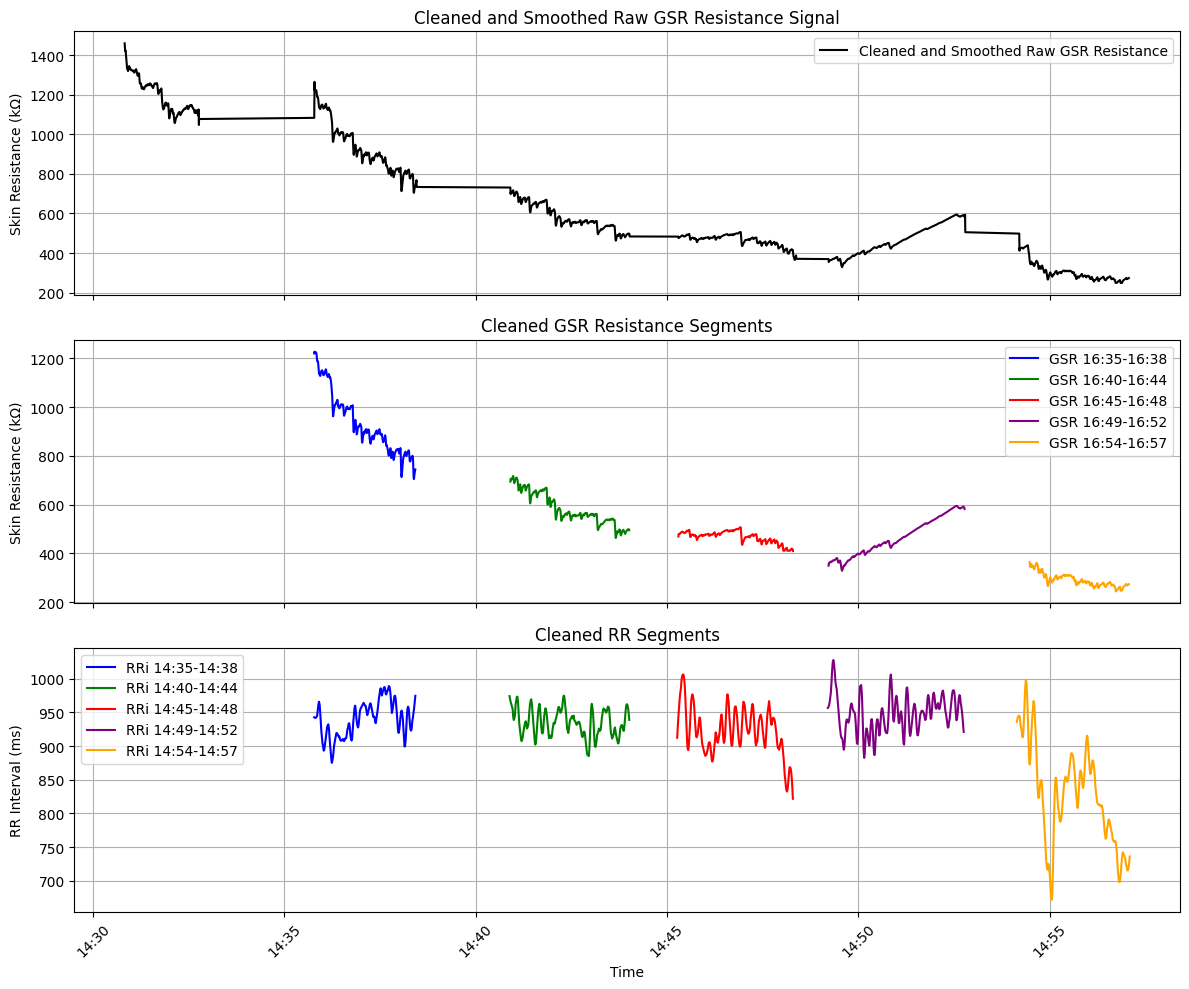

In [102]:
#Plot cleaned full gsr resistance with gsr segments and rr segments

# Paths to cleaned GSR and RR files
cleaned_gsr_file = 'Data/Cleaned_data/GSR_full_cleaned.csv'
gsr_segment_files = [
    'Data/Cleaned_data/GSR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv'
]
rr_files = [
    'Data/RR_2024_09_20_14_35.csv',
    'Data/RR_2024_09_20_14_40.csv',
    'Data/RR_2024_09_20_14_45.csv',
    'Data/RR_2024_09_20_14_49.csv',
    'Data/RR_2024_09_20_14_54.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot the cleaned and smoothed raw GSR resistance signal
df_cleaned_gsr = pd.read_csv(cleaned_gsr_file)
df_cleaned_gsr['adjusted_time'] = pd.to_datetime(df_cleaned_gsr['adjusted_time'])

axs[0].plot(
    df_cleaned_gsr['adjusted_time'],
    df_cleaned_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'],
    label="GSR Skin Conductance",
    color='black'
)
axs[0].set_title("Cleaned and Smoothed Full GSR Conductance Signal")
axs[0].set_ylabel("Skin Resistance (kΩ)")
axs[0].legend()
axs[0].grid(True)

# Plot cleaned GSR segments
for gsr_file, color in zip(gsr_segment_files, colors):
    df_gsr_segment = pd.read_csv(gsr_file)
    df_gsr_segment['adjusted_time_for_plot'] = pd.to_datetime(df_gsr_segment['adjusted_time_for_plot'])

    start_time = df_gsr_segment['adjusted_time_for_plot'].min().strftime('%H:%M')
    end_time = df_gsr_segment['adjusted_time_for_plot'].max().strftime('%H:%M')
    label = f"{start_time}-{end_time}"

    axs[1].plot(
        df_gsr_segment['adjusted_time_for_plot'],
        df_gsr_segment['Shimmer_8280_GSR_Skin_Conductance_CAL'],
        label=f"GSR {label}",
        color=color
    )

axs[1].set_title("Cleaned GSR Resistance Segments")
axs[1].set_ylabel("Skin Resistance (kΩ)")
axs[1].legend()
axs[1].grid(True)

# Plot cleaned RR segments
for rr_file, color in zip(rr_files, colors):
    df_rr = pd.read_csv(rr_file)

    # Convert timestamps to datetime
    df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)

    # Data cleaning: Remove invalid or missing values
    df_rr['sample'] = pd.to_numeric(df_rr['sample'], errors='coerce')
    df_rr.dropna(subset=['sample'], inplace=True)

    # Outlier removal using IQR method
    Q1 = df_rr['sample'].quantile(0.25)
    Q3 = df_rr['sample'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_rr = df_rr[(df_rr['sample'] >= lower_bound) & (df_rr['sample'] <= upper_bound)]

    # Smoothing the RR intervals using Savitzky-Golay filter
    rr_intervals = df_rr['sample'].to_numpy()
    rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"{start_time}-{end_time}"

    # Plot the filtered RR intervals
    axs[2].plot(
        df_rr['adjusted_time'],
        rr_filtered,
        color=color,
        label=f"RRi {label}"
    )

axs[2].set_title("Cleaned RR Segments")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


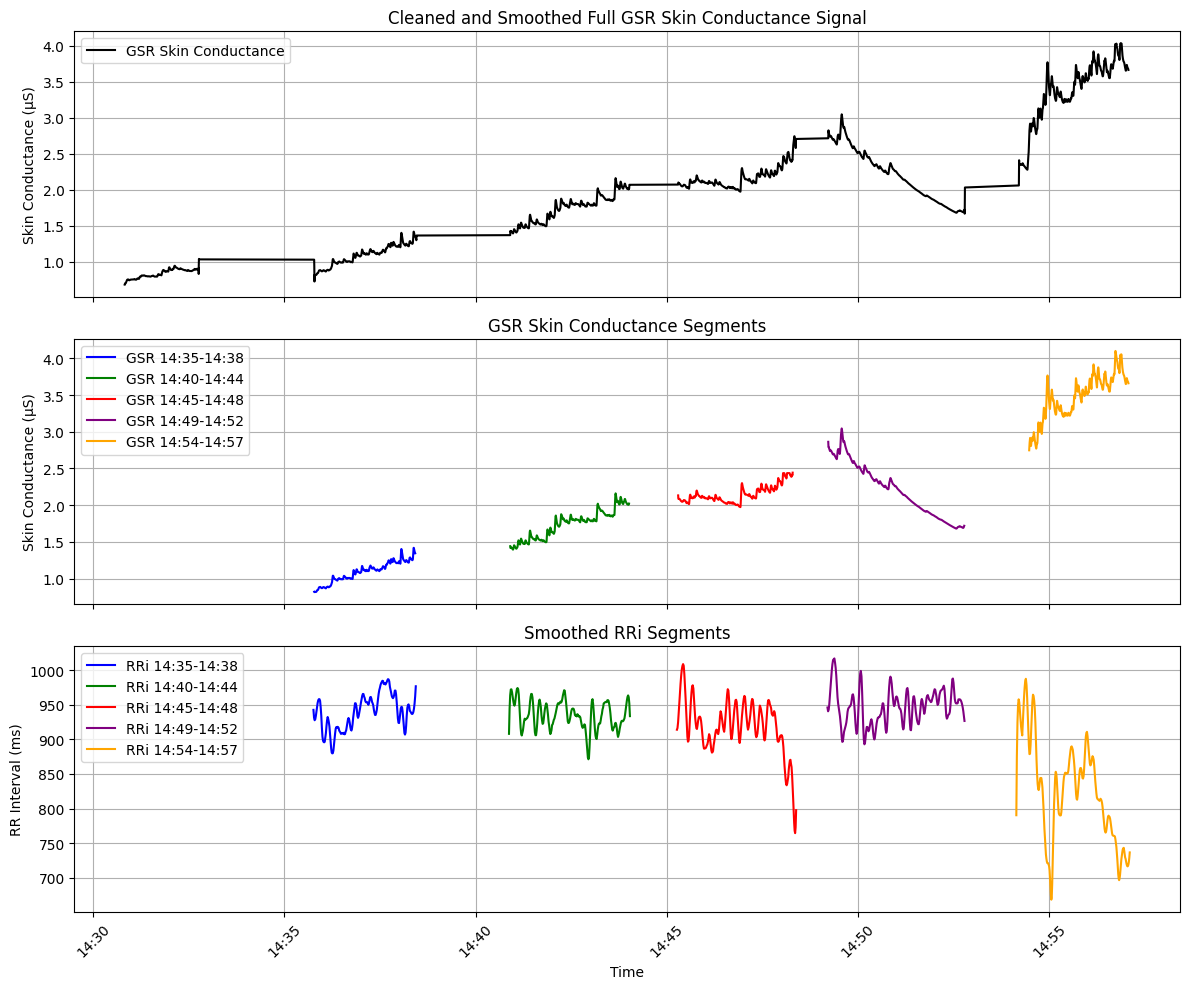

In [113]:
#Plot cleaned full gsr resistance with gsr segments and cleaned and SMOOTHED rr segments

# Paths to cleaned GSR and RR files
cleaned_gsr_file = 'Data/Cleaned_data/GSR_full_cleaned.csv'
gsr_segment_files = [
    'Data/Cleaned_data/GSR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv'
]
rr_files = [
    'Data/Cleaned_data/RR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot the cleaned and smoothed raw GSR resistance signal
df_cleaned_gsr = pd.read_csv(cleaned_gsr_file)
df_cleaned_gsr['adjusted_time'] = pd.to_datetime(df_cleaned_gsr['adjusted_time'])

axs[0].plot(
    df_cleaned_gsr['adjusted_time'],
    df_cleaned_gsr['Shimmer_8280_GSR_Skin_Conductance_CAL'],
    label="GSR Skin Conductance",
    color='black'
)
axs[0].set_title("Cleaned and Smoothed Full GSR Skin Conductance Signal")
axs[0].set_ylabel("Skin Conductance (µS)")
axs[0].legend()
axs[0].grid(True)

# Plot cleaned GSR segments
for gsr_file, color in zip(gsr_segment_files, colors):
    df_gsr_segment = pd.read_csv(gsr_file)
    df_gsr_segment['adjusted_time_for_plot'] = pd.to_datetime(df_gsr_segment['adjusted_time_for_plot'])

     # Convert to datetime and adjust the times
    start_time = df_gsr_segment['adjusted_time_for_plot'].min() - pd.Timedelta(hours=2)
    end_time = df_gsr_segment['adjusted_time_for_plot'].max() - pd.Timedelta(hours=2)

    # Format the adjusted times for labeling
    start_time_label = start_time.strftime('%H:%M')
    end_time_label = end_time.strftime('%H:%M')
    label = f"{start_time_label}-{end_time_label}"

    axs[1].plot(
        df_gsr_segment['adjusted_time_for_plot'],
        df_gsr_segment['Shimmer_8280_GSR_Skin_Conductance_CAL'],
        label=f"GSR {label}",
        color=color
    )

axs[1].set_title("GSR Skin Conductance Segments")
axs[1].set_ylabel("Skin Conductance (µS)")
axs[1].legend()
axs[1].grid(True)

# Plot cleaned RR segments
for rr_file, color in zip(rr_files, colors):
    df_rr = pd.read_csv(rr_file)
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    # # Convert timestamps to datetime
    # df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    # df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    # df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)
    #
    # # Data cleaning: Remove invalid or missing values
    # df_rr['sample'] = pd.to_numeric(df_rr['sample'], errors='coerce')
    # df_rr.dropna(subset=['sample'], inplace=True)
    #
    # # Outlier removal using IQR method
    # Q1 = df_rr['sample'].quantile(0.25)
    # Q3 = df_rr['sample'].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # df_rr = df_rr[(df_rr['sample'] >= lower_bound) & (df_rr['sample'] <= upper_bound)]
    #
    # # Smoothing the RR intervals using Savitzky-Golay filter
    # rr_intervals = df_rr['sample'].to_numpy()
    # rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"{start_time}-{end_time}"

    # Plot the filtered RR intervals
    axs[2].plot(
        df_rr['adjusted_time'],
        df_rr['Smoothed RRi'],
        color=color,
        label=f"RRi {label}"
    )

axs[2].set_title("Smoothed RRi Segments")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

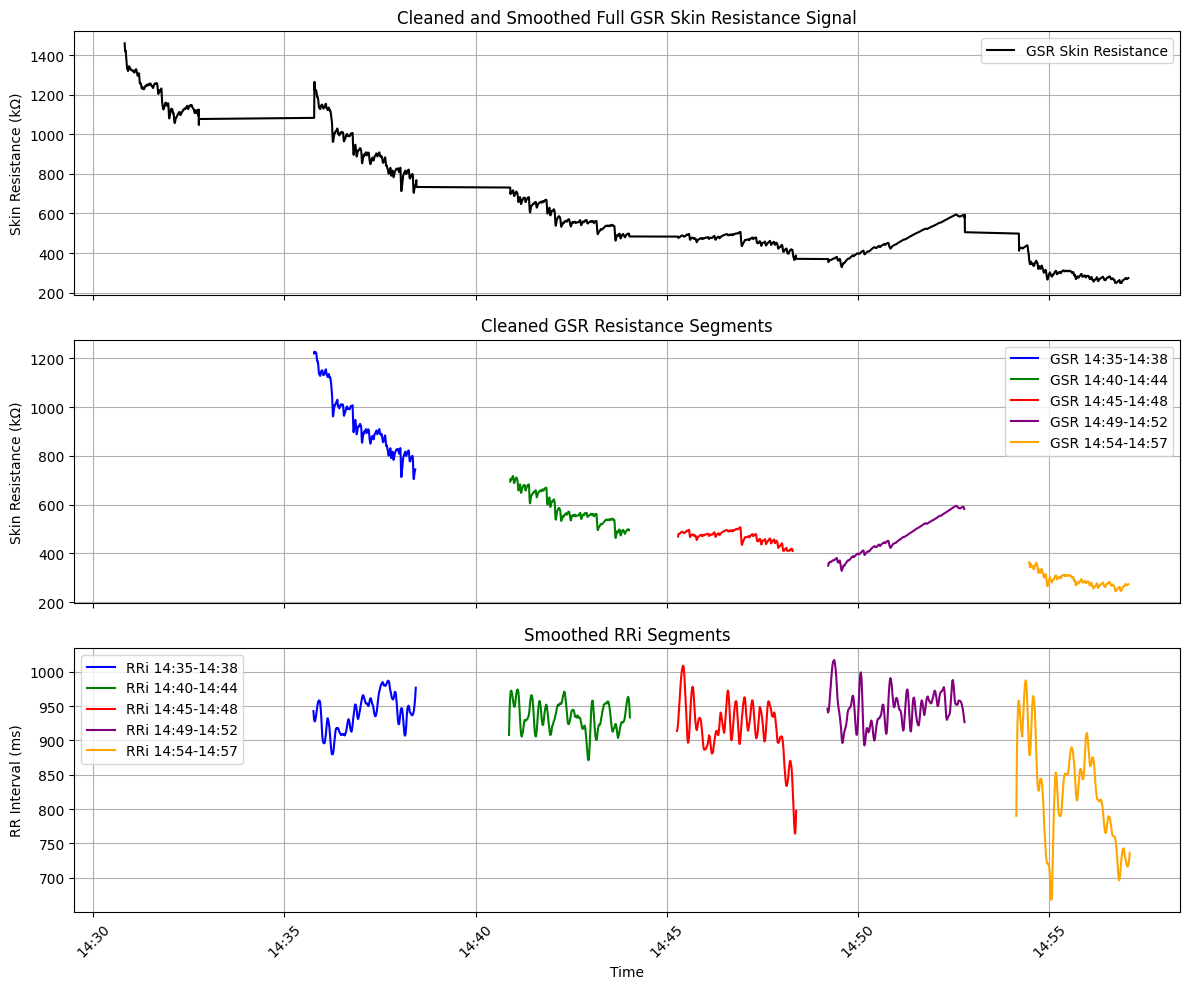

In [114]:
#Plot cleaned full gsr resistance with gsr segments and  SMOOTHED rr segments

# Paths to cleaned GSR and RR files
cleaned_gsr_file = 'Data/Cleaned_data/GSR_full_cleaned.csv'
gsr_segment_files = [
    'Data/Cleaned_data/GSR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/GSR_2024_09_20_14_54_cleaned.csv'
]
rr_files = [
    'Data/Cleaned_data/RR_2024_09_20_14_35_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_40_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_45_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_49_cleaned.csv',
    'Data/Cleaned_data/RR_2024_09_20_14_54_cleaned.csv'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Initialize the figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot the cleaned and smoothed raw GSR resistance signal
df_cleaned_gsr = pd.read_csv(cleaned_gsr_file)
df_cleaned_gsr['adjusted_time'] = pd.to_datetime(df_cleaned_gsr['adjusted_time'])

axs[0].plot(
    df_cleaned_gsr['adjusted_time'],
    df_cleaned_gsr['Shimmer_8280_GSR_Skin_Resistance_CAL'],
    label="GSR Skin Resistance",
    color='black'
)
axs[0].set_title("Cleaned and Smoothed Full GSR Skin Resistance Signal")
axs[0].set_ylabel("Skin Resistance (kΩ)")
axs[0].legend()
axs[0].grid(True)

# Plot cleaned GSR segments
for gsr_file, color in zip(gsr_segment_files, colors):
    df_gsr_segment = pd.read_csv(gsr_file)
    df_gsr_segment['adjusted_time_for_plot'] = pd.to_datetime(df_gsr_segment['adjusted_time_for_plot'])

     # Convert to datetime and adjust the times
    start_time = df_gsr_segment['adjusted_time_for_plot'].min() - pd.Timedelta(hours=2)
    end_time = df_gsr_segment['adjusted_time_for_plot'].max() - pd.Timedelta(hours=2)

    # Format the adjusted times for labeling
    start_time_label = start_time.strftime('%H:%M')
    end_time_label = end_time.strftime('%H:%M')
    label = f"{start_time_label}-{end_time_label}"

    axs[1].plot(
        df_gsr_segment['adjusted_time_for_plot'],
        df_gsr_segment['Shimmer_8280_GSR_Skin_Resistance_CAL'],
        label=f"GSR {label}",
        color=color
    )

axs[1].set_title("Cleaned GSR Resistance Segments")
axs[1].set_ylabel("Skin Resistance (kΩ)")
axs[1].legend()
axs[1].grid(True)

# Plot cleaned RR segments
for rr_file, color in zip(rr_files, colors):
    df_rr = pd.read_csv(rr_file)
    df_rr['adjusted_time'] = pd.to_datetime(df_rr['adjusted_time'])
    # # Convert timestamps to datetime
    # df_rr['timestamp'] = pd.to_numeric(df_rr['timestamp'], errors='coerce')
    # df_rr['adjusted_time'] = pd.to_datetime(df_rr['timestamp'] / 1000, unit='s', errors='coerce')
    # df_rr['adjusted_time'] = df_rr['adjusted_time'] + pd.DateOffset(hours=2)
    #
    # # Data cleaning: Remove invalid or missing values
    # df_rr['sample'] = pd.to_numeric(df_rr['sample'], errors='coerce')
    # df_rr.dropna(subset=['sample'], inplace=True)
    #
    # # Outlier removal using IQR method
    # Q1 = df_rr['sample'].quantile(0.25)
    # Q3 = df_rr['sample'].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # df_rr = df_rr[(df_rr['sample'] >= lower_bound) & (df_rr['sample'] <= upper_bound)]
    #
    # # Smoothing the RR intervals using Savitzky-Golay filter
    # rr_intervals = df_rr['sample'].to_numpy()
    # rr_filtered = savgol_filter(rr_intervals, window_length=11, polyorder=2)

    start_time = df_rr['adjusted_time'].min().strftime('%H:%M')
    end_time = df_rr['adjusted_time'].max().strftime('%H:%M')
    label = f"{start_time}-{end_time}"

    # Plot the filtered RR intervals
    axs[2].plot(
        df_rr['adjusted_time'],
        df_rr['Smoothed RRi'],
        color=color,
        label=f"RRi {label}"
    )

axs[2].set_title("Smoothed RRi Segments")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("RR Interval (ms)")
axs[2].legend()
axs[2].grid(True)

# Format the x-axis for all subplots
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()